Data Splitting

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

url = "https://raw.githubusercontent.com/Shivamiiitd/Machine-Learning/main/Real%20estate.csv"
#Reading data
df = pd.read_csv(url)

#Extracting input features from data
x = df.iloc[:,1:-1].values

#Extracting output (answer) from data
y = np.reshape(df.iloc[:,7].values, (-1, 1))
x_mean = np.mean(x, axis = 0)

#Standard Deviation
x_std = np.std(x, axis = 0)
for i in range(414):
  for j in range(6):
    #Normalising the data values
    x[i][j] = (x[i][j] - x_mean[j])/x_std[j]
x = np.insert(x, 0, 1, axis = 1)

In [2]:
def plot_graph(arr1, arr2, str1, str2):
  plt.plot(arr1, arr2)
  plt.xlabel(str1)
  plt.ylabel(str2)
  plt.show()
  print()

#Root Mean Square Error
def root_mean(y_pred, y):
  error = mean_square_error(y_pred, y)
  return math.sqrt(error)
  
def mean_square_error(y_pred,y):
  len = y_pred.shape;
  error = np.sum((y_pred-y)**2)
  error /= len[0]
  return error

#Linear Regression Gradient Descent
def gradient_descent(x, y, check = False, itr = 800): #itr is the number of epochs
  m = len(y)
  #RMSE and iteration number arrays for plotting graphs
  rmse = []
  itr_num = []

  #Feauture weights array
  w = np.array([[0,0,0,0,0,0,0]])

  #Learning Rate
  aplha = 0.006

  #Training phase
  for i in range(itr):

    #Error in value of output (predicted - actual)
    y_error = np.matmul(x,w.T)-y # 414 X 1
    multiplication = np.matmul(y_error.T,x) # 1 X 7
    w = w - aplha*multiplication/m
    if(check):
      rmse.append(root_mean(np.matmul(x, w.T), y))
      itr_num.append(i)
  if(check):
    plot_graph(itr_num, rmse, "iteration number", "RMSE")
  return w

K-Fold cross validation
Splitting K = 2

In [3]:
shapeX = x.shape
shapeY = y.shape

#Splitting for K = 2
A_X = x[0:int(shapeX[0]/2),:]
A_Y = y[0:int(shapeY[0]/2),:]
B_X = x[int(shapeX[0]/2):,:] 
B_Y = y[int(shapeY[0]/2):,:]

#Training of the Model
w_A = gradient_descent(A_X, A_Y)
w_B = gradient_descent(B_X, B_Y)

#Testing of the Model
y_pred_A = np.matmul(B_X, w_A.T)
error_A = root_mean(y_pred_A, B_Y)
y_pred_B = np.matmul(A_X, w_B.T)
error_B = root_mean(y_pred_B, A_Y)

#Average Error
print((error_A + error_B)/2)

8.908193046983055


Splitting K = 3

In [4]:
shapeX = x.shape
shapeY = y.shape

#Splitting for K = 3
A_X = x[0:int(shapeX[0]/3),:]
A_Y = y[0:int(shapeY[0]/3),:]
B_X = x[int(shapeX[0]/3): int(2*shapeX[0]/3),:] 
B_Y = y[int(shapeY[0]/3): int(2*shapeY[0]/3),:]
C_X = x[int(2*shapeX[0]/3):, :]
C_Y = y[int(2*shapeY[0]/3):, :]

#Concatenating to make training set and testing set
train_AB_X = np.concatenate((A_X,B_X),axis = 0)
train_AB_Y = np.concatenate((A_Y,B_Y),axis = 0)
train_AC_X = np.concatenate((A_X,C_X),axis = 0)
train_AC_Y = np.concatenate((A_Y,C_Y),axis = 0)
train_BC_X = np.concatenate((B_X,C_X),axis = 0)
train_BC_Y = np.concatenate((B_Y, C_Y),axis = 0)

#Training of the model
w_AB = gradient_descent(train_AB_X, train_AB_Y)
w_AC = gradient_descent(train_AC_X, train_AC_Y)
w_BC = gradient_descent(train_BC_X, train_BC_Y)

#Testing of the model
y_pred_AB = np.matmul(C_X, w_AB.T)
y_pred_AC = np.matmul(B_X, w_AC.T)
y_pred_BC = np.matmul(A_X, w_BC.T)
error_AB = root_mean(y_pred_AB, C_Y)
error_AC = root_mean(y_pred_AC, B_Y)
error_BC = root_mean(y_pred_BC, A_Y)

#Average Error
print((error_AB + error_AC + error_BC)/3)

8.86674278546279


Splitting K = 4

In [5]:
shapeX = x.shape
shapeY = y.shape

#Splitting for K = 4
A_X = x[0:int(shapeX[0]/4),:]
A_Y = y[0:int(shapeY[0]/4),:]
B_X = x[int(shapeX[0]/4): int(shapeX[0]/2),:] 
B_Y = y[int(shapeY[0]/4): int(shapeY[0]/2),:]
C_X = x[int(shapeX[0]/2): int(3*shapeX[0]/4), :]
C_Y = y[int(shapeY[0]/2): int(3*shapeY[0]/4), :]
D_X = x[int(3*shapeX[0]/4):, :]
D_Y = y[int(3*shapeY[0]/4):, :]

#Concatenating to make training set and testing set
train_ABC_X = np.concatenate((A_X,B_X,C_X),axis = 0)
train_ABD_X = np.concatenate((A_X,B_X,D_X),axis = 0)
train_BCD_X = np.concatenate((B_X,C_X,D_X),axis = 0)
train_ACD_X = np.concatenate((A_X,C_X,D_X),axis = 0)
train_ABC_Y = np.concatenate((A_Y,B_Y,C_Y),axis = 0)
train_ABD_Y = np.concatenate((A_Y,B_Y,D_Y),axis = 0)
train_BCD_Y = np.concatenate((B_Y,C_Y,D_Y),axis = 0)
train_ACD_Y = np.concatenate((A_Y,C_Y,D_Y),axis = 0)

#Training of the model
w_ABC = gradient_descent(train_ABC_X, train_ABC_Y)
w_ABD = gradient_descent(train_ABD_X, train_ABD_Y)
w_BCD = gradient_descent(train_BCD_X, train_BCD_Y)
w_ACD = gradient_descent(train_ACD_X, train_ACD_Y)

#Testing of the model
y_pred_ABC = np.matmul(D_X, w_ABC.T)
y_pred_ABD = np.matmul(C_X, w_ABD.T)
y_pred_BCD = np.matmul(A_X, w_BCD.T)
y_pred_ACD = np.matmul(B_X, w_ACD.T)

error_ABC = root_mean(y_pred_ABC, D_Y)
error_ABD = root_mean(y_pred_ABD, C_Y)
error_BCD = root_mean(y_pred_BCD, A_Y)
error_ACD = root_mean(y_pred_ACD, B_Y)

#Average Error
print((error_ABC + error_ABD + error_BCD + error_ACD)/4)

8.838715965352456


Splitting K = 5

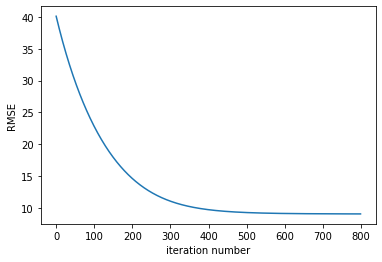

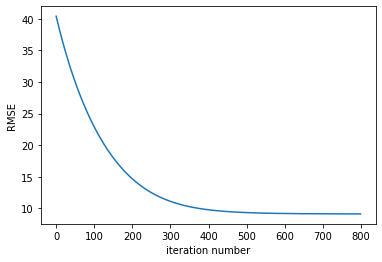

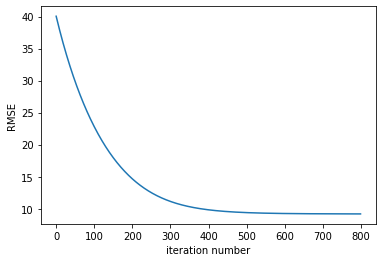

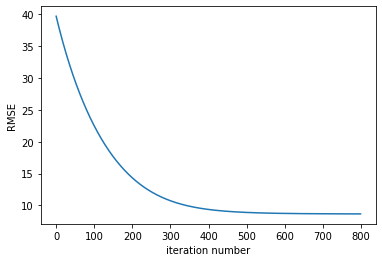

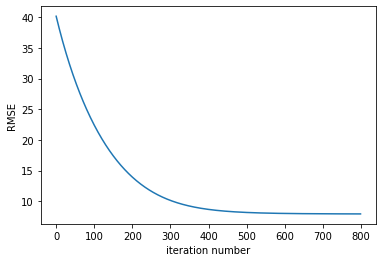


Average RMSE on val set is :
8.71771972366396

Average RMSE on train set is :
8.79440638508509


In [6]:
shapeX = x.shape
shapeY = y.shape

#Splitting for K = 5
A_X = x[0:int(shapeX[0]/5),:]
A_Y = y[0:int(shapeY[0]/5),:]
B_X = x[int(shapeX[0]/5): int(2*shapeX[0]/5),:] 
B_Y = y[int(shapeY[0]/5): int(2*shapeY[0]/5),:]
C_X = x[int(2*shapeX[0]/5): int(3*shapeX[0]/5), :]
C_Y = y[int(2*shapeY[0]/5): int(3*shapeY[0]/5), :]
D_X = x[int(3*shapeX[0]/5): int(4*shapeX[0]/5), :]
D_Y = y[int(3*shapeY[0]/5): int(4*shapeY[0]/5), :]
E_X = x[int(4*shapeX[0]/5):, :]
E_Y = y[int(4*shapeY[0]/5):, :]

#Concatenating to make training set and testing set
train_ABCD_X = np.concatenate((A_X,B_X,C_X,D_X),axis = 0)
train_ABDE_X = np.concatenate((A_X,B_X,D_X,E_X),axis = 0)
train_BCDE_X = np.concatenate((B_X,C_X,D_X,E_X),axis = 0)
train_ACDE_X = np.concatenate((A_X,C_X,D_X,E_X),axis = 0)
train_ABCE_X = np.concatenate((A_X,B_X,C_X,E_X),axis = 0)
train_ABCD_Y = np.concatenate((A_Y,B_Y,C_Y,D_Y),axis = 0)
train_ABDE_Y = np.concatenate((A_Y,B_Y,D_Y,E_Y),axis = 0)
train_BCDE_Y = np.concatenate((B_Y,C_Y,D_Y,E_Y),axis = 0)
train_ACDE_Y = np.concatenate((A_Y,C_Y,D_Y,E_Y),axis = 0)
train_ABCE_Y = np.concatenate((A_Y,B_Y,C_Y,E_Y),axis = 0)

#Training of the model
w_ABCD = gradient_descent(train_ABCD_X, train_ABCD_Y, True)
w_ABDE = gradient_descent(train_ABDE_X, train_ABDE_Y, True)
w_BCDE = gradient_descent(train_BCDE_X, train_BCDE_Y, True)
w_ACDE = gradient_descent(train_ACDE_X, train_ACDE_Y, True)
w_ABCE = gradient_descent(train_ABCE_X, train_ABCE_Y, True)

#Testing of the model
y_pred_ABCD = np.matmul(E_X, w_ABCD.T)
y_pred_ABDE = np.matmul(C_X, w_ABDE.T)
y_pred_BCDE = np.matmul(A_X, w_BCDE.T)
y_pred_ACDE = np.matmul(B_X, w_ACDE.T)
y_pred_ABCE = np.matmul(D_X, w_ABCE.T)

#Validation (Testing) error
error_ABCD = root_mean(y_pred_ABCD, E_Y)
error_ABDE = root_mean(y_pred_ABDE, C_Y)
error_BCDE = root_mean(y_pred_BCDE, A_Y)
error_ACDE = root_mean(y_pred_ACDE, B_Y)
error_ABCE = root_mean(y_pred_ABCE, D_Y)

#Training Error
T_error_ABCD = root_mean(np.matmul(train_ABCD_X, w_ABCD.T), train_ABCD_Y)
T_error_ABDE = root_mean(np.matmul(train_ABDE_X, w_ABDE.T), train_ABDE_Y)
T_error_BCDE = root_mean(np.matmul(train_BCDE_X, w_BCDE.T), train_BCDE_Y)
T_error_ACDE = root_mean(np.matmul(train_ACDE_X, w_ACDE.T), train_ACDE_Y)
T_error_ABCE = root_mean(np.matmul(train_ABCE_X, w_ABCE.T), train_ABCE_Y)

print("Average RMSE on val set is :")
print((error_ABCD + error_ABDE + error_BCDE + error_ACDE + error_ABCE)/5)
print()
print("Average RMSE on train set is :")
print((T_error_ABCD + T_error_ABDE + T_error_BCDE + T_error_ACDE + T_error_ABCE)/5)

Lasso Regularization

In [7]:
def lasso_gradient(x, y, itr = 1250):
  #loss at each iteration and iteration number array
  itr_num = []
  lae = []
  m = len(y)

  #Parameter of Regularization
  rate = 0.075
  w = np.array([[2,2,2,2,2,2,2]])

  #Learing rate from linear Regression
  aplha = 0.006
  for i in range(itr):
    y_error = np.matmul(x,w.T)-y # 414 X 1
    multiplication = np.matmul(y_error.T,x) # 1 X 7
    w = w - (aplha*multiplication - 2*rate*np.sum(w/(np.abs(w))))/m
    itr_num.append(i)
    lae.append(root_mean(np.matmul(x, w.T), y))
  plot_graph(itr_num, lae, "iteration number", "loss at each iteration")
  return w


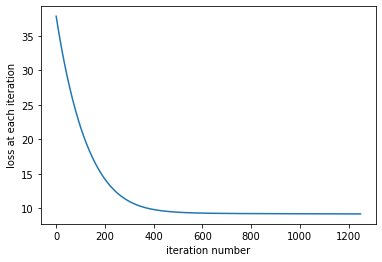

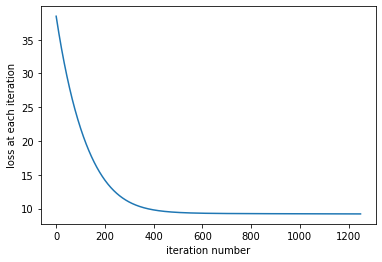

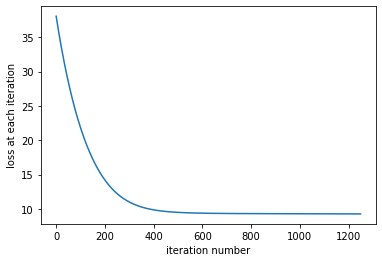

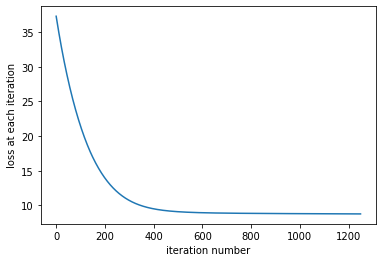

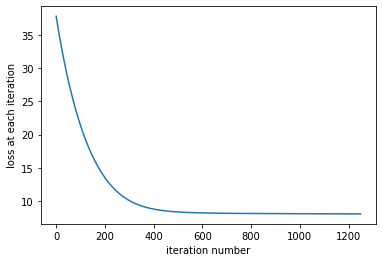


Average RMSE on val set is :
8.84716262315071

Average RMSE on train set is :
8.909416061148246


In [8]:
#Training on the sets of K = 5 cross validation
w_ABCD = lasso_gradient(train_ABCD_X, train_ABCD_Y)
w_ABDE = lasso_gradient(train_ABDE_X, train_ABDE_Y)
w_BCDE = lasso_gradient(train_BCDE_X, train_BCDE_Y)
w_ACDE = lasso_gradient(train_ACDE_X, train_ACDE_Y)
w_ABCE = lasso_gradient(train_ABCE_X, train_ABCE_Y)

#Testing on the sets of k = 5 cross validation
y_pred_ABCD = np.matmul(E_X, w_ABCD.T)
y_pred_ABDE = np.matmul(C_X, w_ABDE.T)
y_pred_BCDE = np.matmul(A_X, w_BCDE.T)
y_pred_ACDE = np.matmul(B_X, w_ACDE.T)
y_pred_ABCE = np.matmul(D_X, w_ABCE.T)

#Validation (Testing) error
error_ABCD = root_mean(y_pred_ABCD, E_Y)
error_ABDE = root_mean(y_pred_ABDE, C_Y)
error_BCDE = root_mean(y_pred_BCDE, A_Y)
error_ACDE = root_mean(y_pred_ACDE, B_Y)
error_ABCE = root_mean(y_pred_ABCE, D_Y)

#Training Error
T_error_ABCD = root_mean(np.matmul(train_ABCD_X, w_ABCD.T), train_ABCD_Y)
T_error_ABDE = root_mean(np.matmul(train_ABDE_X, w_ABDE.T), train_ABDE_Y)
T_error_BCDE = root_mean(np.matmul(train_BCDE_X, w_BCDE.T), train_BCDE_Y)
T_error_ACDE = root_mean(np.matmul(train_ACDE_X, w_ACDE.T), train_ACDE_Y)
T_error_ABCE = root_mean(np.matmul(train_ABCE_X, w_ABCE.T), train_ABCE_Y)

print("Average RMSE on val set is :")
print((error_ABCD + error_ABDE + error_BCDE + error_ACDE + error_ABCE)/5)
print()
print("Average RMSE on train set is :")
print((T_error_ABCD + T_error_ABDE + T_error_BCDE + T_error_ACDE + T_error_ABCE)/5)

Ridge Regularization

In [9]:
def ridge_gradient(x, y, itr = 1250):
  #loss at each iteration and iteration number array
  lae = []
  itr_num = []
  m = len(y)

  #Parameter of Regularization
  rate = 0.005
  w = np.array([[2,2,2,2,2,2,2]])

  #Learing rate from linear Regression
  alpha = 0.006
  for i in range(itr):
    y_error = np.matmul(x,w.T)-y # 414 X 1
    multiplication = np.matmul(y_error.T,x) # 1 X 7
    w = (1 - 2*rate*alpha)*w - 2*alpha*multiplication/m
    itr_num.append(i)
    lae.append(root_mean(np.matmul(x, w.T), y))
  plot_graph(itr_num, lae, "iteration number", "loss at each iteration")
  return w

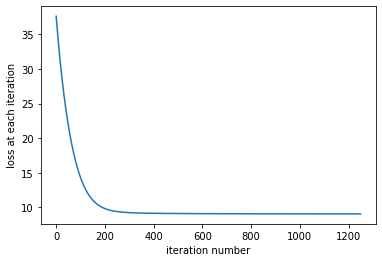

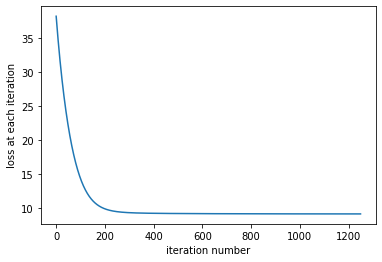

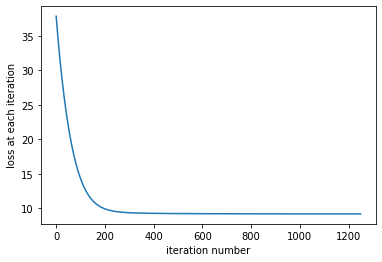

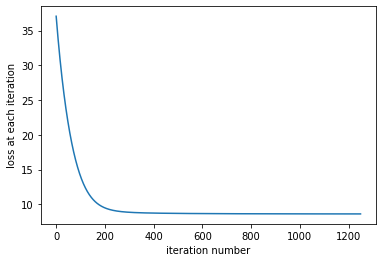

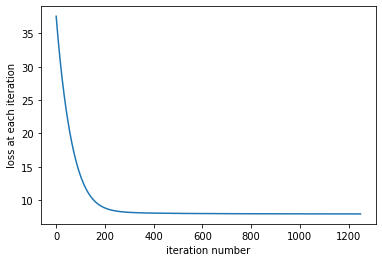


Average RMSE on val set is :
8.696908138120142

Average RMSE on train set is :
8.769262007300503


In [10]:
#Training on the sets of K = 5 cross validation
w_ABCD = ridge_gradient(train_ABCD_X, train_ABCD_Y)
w_ABDE = ridge_gradient(train_ABDE_X, train_ABDE_Y)
w_BCDE = ridge_gradient(train_BCDE_X, train_BCDE_Y)
w_ACDE = ridge_gradient(train_ACDE_X, train_ACDE_Y)
w_ABCE = ridge_gradient(train_ABCE_X, train_ABCE_Y)

#Testing on the sets of K = 5 cross validation
y_pred_ABCD = np.matmul(E_X, w_ABCD.T)
y_pred_ABDE = np.matmul(C_X, w_ABDE.T)
y_pred_BCDE = np.matmul(A_X, w_BCDE.T)
y_pred_ACDE = np.matmul(B_X, w_ACDE.T)
y_pred_ABCE = np.matmul(D_X, w_ABCE.T)

#Validation (Testing) error
error_ABCD = root_mean(y_pred_ABCD, E_Y)
error_ABDE = root_mean(y_pred_ABDE, C_Y)
error_BCDE = root_mean(y_pred_BCDE, A_Y)
error_ACDE = root_mean(y_pred_ACDE, B_Y)
error_ABCE = root_mean(y_pred_ABCE, D_Y)

#Training Error
T_error_ABCD = root_mean(np.matmul(train_ABCD_X, w_ABCD.T), train_ABCD_Y)
T_error_ABDE = root_mean(np.matmul(train_ABDE_X, w_ABDE.T), train_ABDE_Y)
T_error_BCDE = root_mean(np.matmul(train_BCDE_X, w_BCDE.T), train_BCDE_Y)
T_error_ACDE = root_mean(np.matmul(train_ACDE_X, w_ACDE.T), train_ACDE_Y)
T_error_ABCE = root_mean(np.matmul(train_ABCE_X, w_ABCE.T), train_ABCE_Y)

print("Average RMSE on val set is :")
print((error_ABCD + error_ABDE + error_BCDE + error_ACDE + error_ABCE)/5)
print()
print("Average RMSE on train set is :")
print((T_error_ABCD + T_error_ABDE + T_error_BCDE + T_error_ACDE + T_error_ABCE)/5)

Normal Form

In [11]:
def normal_form(x, y):
  #inverse of a matrix
  z = np.linalg.inv(np.matmul(x.T, x))
  p = np.matmul(z, np.matmul(x.T, y))
  return p

In [13]:
#Training on the sets of K = 5 cross validation
w_ABCD = normal_form(train_ABCD_X, train_ABCD_Y)
w_ABDE = normal_form(train_ABDE_X, train_ABDE_Y)
w_BCDE = normal_form(train_BCDE_X, train_BCDE_Y)
w_ACDE = normal_form(train_ACDE_X, train_ACDE_Y)
w_ABCE = normal_form(train_ABCE_X, train_ABCE_Y)

#Testing on the sets of K = 5 cross validation
y_pred_ABCD = np.matmul(E_X, w_ABCD)
y_pred_ABDE = np.matmul(C_X, w_ABDE)
y_pred_BCDE = np.matmul(A_X, w_BCDE)
y_pred_ACDE = np.matmul(B_X, w_ACDE)
y_pred_ABCE = np.matmul(D_X, w_ABCE)

error_ABCD = root_mean(y_pred_ABCD, E_Y)
error_ABDE = root_mean(y_pred_ABDE, C_Y)
error_BCDE = root_mean(y_pred_BCDE, A_Y)
error_ACDE = root_mean(y_pred_ACDE, B_Y)
error_ABCE = root_mean(y_pred_ABCE, D_Y)

#Average error
print((error_ABCD + error_ABDE + error_BCDE + error_ACDE + error_ABCE)/5)

8.690026077615585
